In [8]:
import os

import torch
from torch.nn import Module
from isa_conv_AE import ConvolutionalAutoencoder
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [17]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# CONFIG

BASE_PATH = (
    "/Users/maksym/Uni/master/coding/master-thesis/final_code/convolutional_AE/convolutional_AE_2d"
)
BATCH_SIZE = 1
LATENT_DIMS = 2
NUM_BATCHES = 50
LR = 3e-4
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
FONTSIZE_LATENT = 30
FONTSIZE_INFERENCE = 20

In [15]:
import matplotlib.pyplot as plt

# plot
def inference_convolutional_ae(
    model: Module,
    data_loader: DataLoader,
    amount: int,
) -> None:
    width = 28
    recons = []
    recon = []

    for num in range(10):
        for imgs, labels in data_loader:
            if len(recon) >= 10:
                continue
            for img, label in zip(imgs, labels):
                if len(recon) >= 10:
                    continue
                if label != num:
                    continue

                img_rec = model(img).to(DEVICE).detach()
                # img_rec = img_rec.reshape(28, 28)
                recon.append(img_rec)
        recons.append(recon)
        recon = []

    img = torch.zeros((amount * width, amount * width))

    for i, recs in enumerate(recons):
        for j, recon in enumerate(recs):
            img[
                (amount - 1 - i) * width : (amount - 1 - i + 1) * width,
                j * width : (j + 1) * width,
            ] = recon
    plt.title("Inference of autoencoder", fontsize=FONTSIZE_INFERENCE)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    # dir_path = os.path.dirname(os.path.realpath(__file__))
    # file_name = (
    #     f"{os.path.basename(os.path.dirname(os.path.realpath(__file__)))}_inference.png"
    # )
    # plt.savefig(os.path.join(dir_path, file_name))
    plt.show()


In [18]:
# data
transform = transforms.ToTensor()
data = datasets.MNIST(root="./data", download=True, train=True, transform=transform)
data_loader = DataLoader(dataset=data, batch_size=BATCH_SIZE, shuffle=True)

file_path = os.path.join(
    BASE_PATH,
    "version_0/checkpoints/epoch=9999-step=30000.ckpt",
)

model = ConvolutionalAutoencoder.load_from_checkpoint(
    file_path, map_location=torch.device(DEVICE), latent_dims=LATENT_DIMS, lr=LR
)

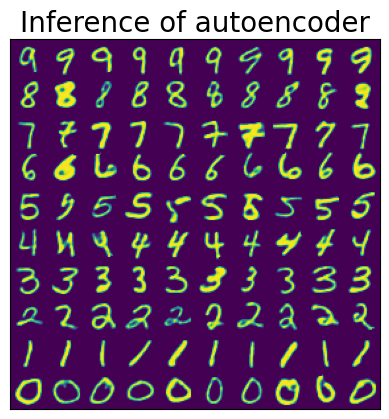

In [16]:
inference_convolutional_ae(model, data_loader, 10)

# Visualising the latent representation of convolutional autoencoders

Idea: we have one pixel with 64 channels, maybe we can create a bar plot and see connections?

In [43]:
amount, max_amount = 0, 10
encodings = {}
while amount <= max_amount:
    for img, label in data_loader:
        encodings.update({amount: {"label": label, "encoding": model.encoder(img)}})
    amount += 1

In [133]:

encodings = {}
for lab in range(10):
    amount, max_amount = 0, 20
    encodings_per_digit = {}
    while amount < max_amount:
        for img, label in data_loader:
            if label != lab:
                continue
            encodings_per_digit.update({amount: {"encoding": model.encoder(img)}})
        amount += 1
    print(f"completed digit: {lab}!")
    encodings.update({lab: encodings_per_digit})

completed digit: 0!
completed digit: 1!
completed digit: 2!
completed digit: 3!
completed digit: 4!
completed digit: 5!
completed digit: 6!
completed digit: 7!
completed digit: 8!
completed digit: 9!


In [162]:
import pandas as pd
dfs = {} 
for label, encodings_per_digit in encodings.items():

    avg = torch.zeros((64, 1))
    flattened = torch.empty((64, 0))

    for encoding in encodings_per_digit.values():
        enc = encoding["encoding"]
        current = torch.tensor([entry[0] for entry in enc.detach()[0]]).unsqueeze(1)
        flattened = torch.cat((flattened, current), -1)
        avg = avg + current
    df = pd.DataFrame(flattened)
    df["average"] = avg / max_amount
    dfs.update({label: df})

In [194]:
for label, encodings_per_digit in encodings.items():

    avg = torch.zeros((64, 1))
    flattened = torch.empty((64, 0))

    for encoding in encodings_per_digit.values():
        current = torch.tensor([entry[0] for entry in enc.detach()[0]]).unsqueeze(1)
        enc = encoding["encoding"]
        print(current)
        break

tensor([[ 0.0000],
        [ 0.0000],
        [27.9892],
        [22.8889],
        [20.5454],
        [ 0.0000],
        [ 0.0000],
        [39.6849],
        [ 0.0000],
        [ 0.0000],
        [60.6948],
        [23.7474],
        [19.5446],
        [28.4245],
        [47.3692],
        [18.7141],
        [ 8.7973],
        [ 0.0000],
        [25.3075],
        [20.0624],
        [ 0.0000],
        [ 0.0000],
        [23.3262],
        [23.1236],
        [12.1197],
        [33.3842],
        [ 0.0000],
        [ 0.0000],
        [20.5872],
        [62.2057],
        [ 0.0000],
        [30.9937],
        [ 0.0000],
        [ 0.0000],
        [29.7493],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [37.7434],
        [40.6189],
        [ 0.0000],
        [25.1832],
        [26.2081],
        [ 0.0000],
        [20.2936],
        [ 0.0000],
        [37.5051],
        [15.0021],
        [15.0935],
        [17.9498],
        [42.1261],
        [31.2054],
        [32.

In [181]:
for df in dfs.values():
    for i in range(20):
        df.rename(columns={i: f"example {i}"}, inplace=True)

['example 0', 'example 1', 'example 2', 'example 3', 'example 4', 'example 5', 'example 6', 'example 7', 'example 8', 'example 9', 'example 10', 'example 11', 'example 12', 'example 13', 'example 14', 'example 15', 'example 16', 'example 17', 'example 18', 'example 19', 'average']
['example 0', 'example 1', 'example 2', 'example 3', 'example 4', 'example 5', 'example 6', 'example 7', 'example 8', 'example 9', 'example 10', 'example 11', 'example 12', 'example 13', 'example 14', 'example 15', 'example 16', 'example 17', 'example 18', 'example 19', 'average']
['example 0', 'example 1', 'example 2', 'example 3', 'example 4', 'example 5', 'example 6', 'example 7', 'example 8', 'example 9', 'example 10', 'example 11', 'example 12', 'example 13', 'example 14', 'example 15', 'example 16', 'example 17', 'example 18', 'example 19', 'average']
['example 0', 'example 1', 'example 2', 'example 3', 'example 4', 'example 5', 'example 6', 'example 7', 'example 8', 'example 9', 'example 10', 'example 

In [223]:
encodings_per_digit = []
for img, lbl in data_loader:
    if lbl != label:
        continue
    encodings_per_digit.append(torch.flatten(model.encoder(img).detach()))

In [228]:
print(type(encodings_per_digit[0]))

<class 'torch.Tensor'>


In [237]:
temp1, temp2 = torch.ones(5), torch.ones(5)
list_temp = [temp1, temp2]

torch.stack(list_temp).sum(0)

tensor([2., 2., 2., 2., 2.])

In [243]:
torch.stack(encodings_per_digit)[0]

tensor([ 0.0000,  0.0000, 34.7607, 26.9088, 16.7505,  0.0000,  0.0000, 45.5840,
         0.0000,  0.0000, 59.0257, 23.5730, 26.0499, 21.9474, 37.9931, 20.6499,
        10.0983,  0.0000, 20.9448, 29.9924,  0.0000,  0.0000, 31.7687, 17.2110,
        14.9293, 21.7826,  0.0000,  0.0000, 15.9151, 48.3742,  0.0000, 47.7420,
         0.0000,  0.0000, 31.1812,  0.0000,  0.0000,  0.0000, 29.7696, 31.1750,
         0.0000, 31.5074, 35.8986,  0.0000, 26.6933,  0.0000, 18.0723, 14.0955,
        24.5971, 29.3558, 37.9804, 36.8056, 30.6413, 19.7925, 19.0108, 35.1520,
        21.1195,  0.0000, 19.1179,  0.0000, 18.4587, 39.0851, 32.5821, 33.4570])

In [196]:
import pickle


with open('dict_of_dfs.pickle', 'wb') as f:
    pickle.dump(dfs, f)

In [199]:
with open('dict_of_dfs.pickle', 'rb') as f:
    loaded = pickle.load(f)

In [200]:
loaded

{0:     example 0  example 1  example 2  example 3  example 4  example 5   
 0    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000  \
 1    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
 2   43.310154  36.124283  44.912567  25.077646  38.517166  26.064186   
 3   33.405769  25.610846  42.427219  19.240992  41.113667  46.630726   
 4   19.842968  39.642803  46.842030  39.767284  33.584652  47.394829   
 ..        ...        ...        ...        ...        ...        ...   
 59   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
 60  21.150106  33.639282  20.005867  23.096994  15.398335  26.468390   
 61  30.733438  33.741360  24.700512  28.223034  51.426525  35.401768   
 62  53.150547  47.799866  40.160999  56.650524  45.520496  36.894489   
 63  28.976820  23.784342  19.273388  28.378948  16.724323  10.879794   
 
     example 6  example 7  example 8  example 9  ...  example 11  example 12   
 0    0.000000   0.000000   0.000000   

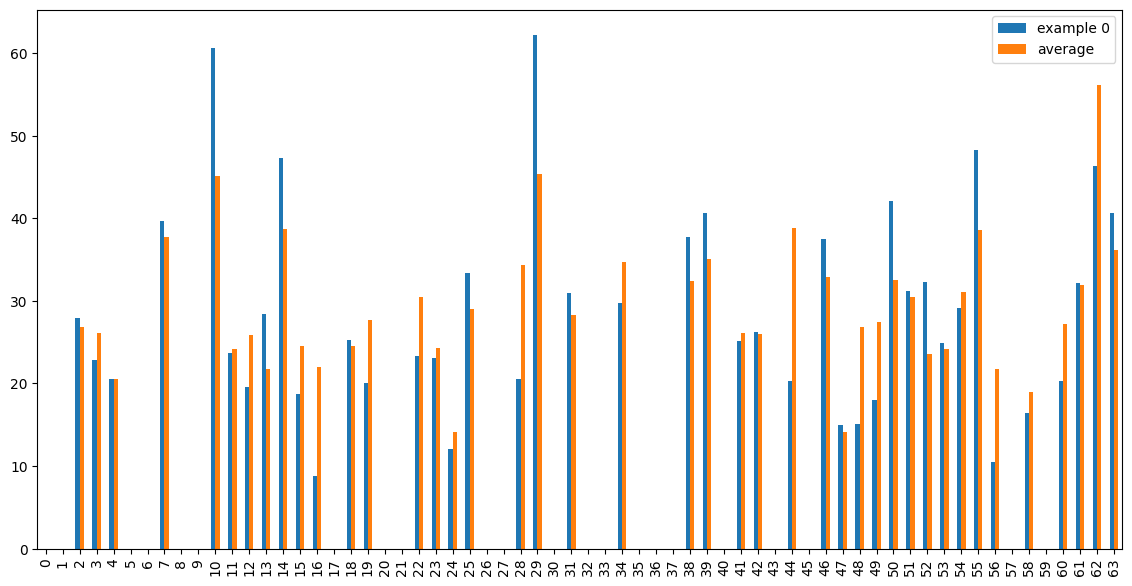

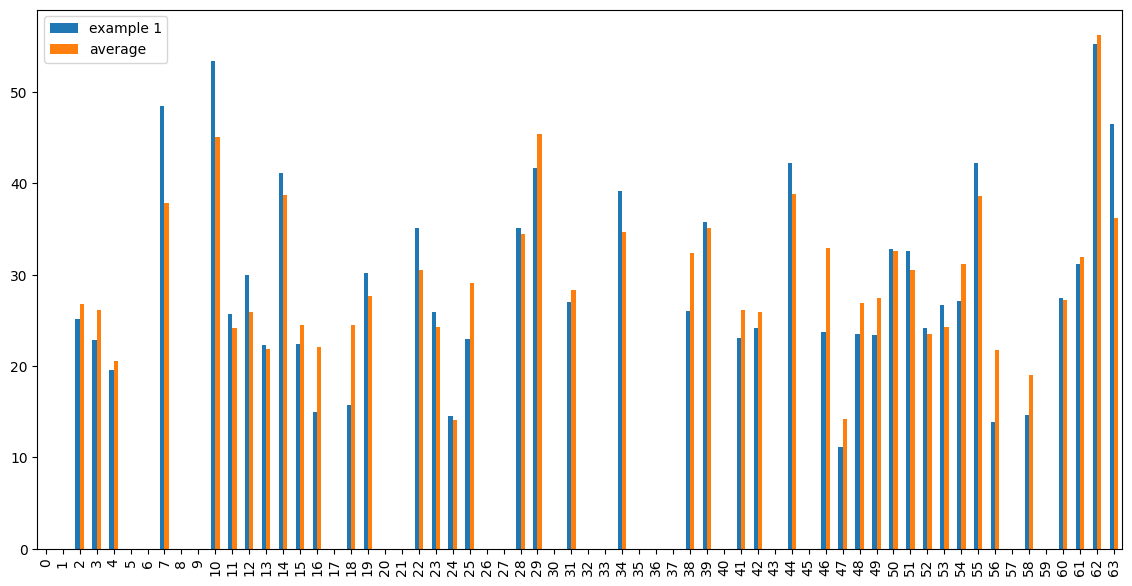

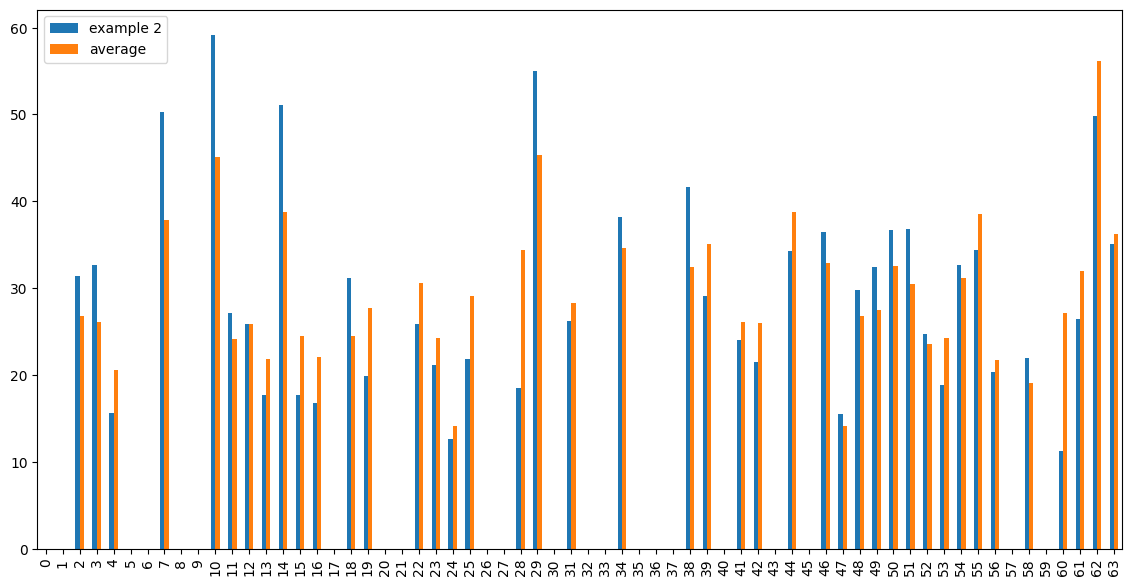

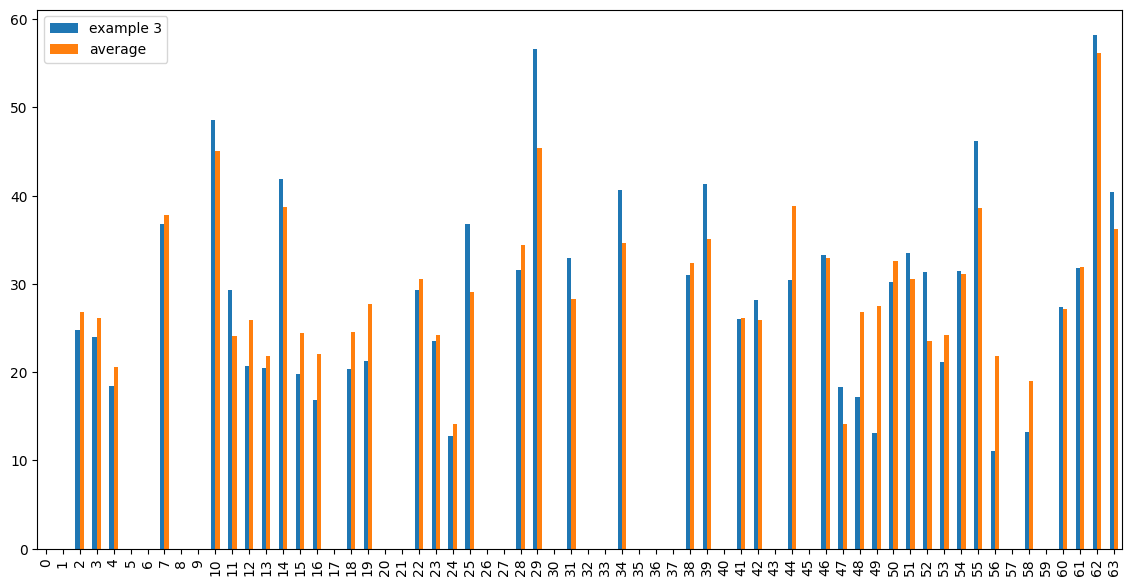

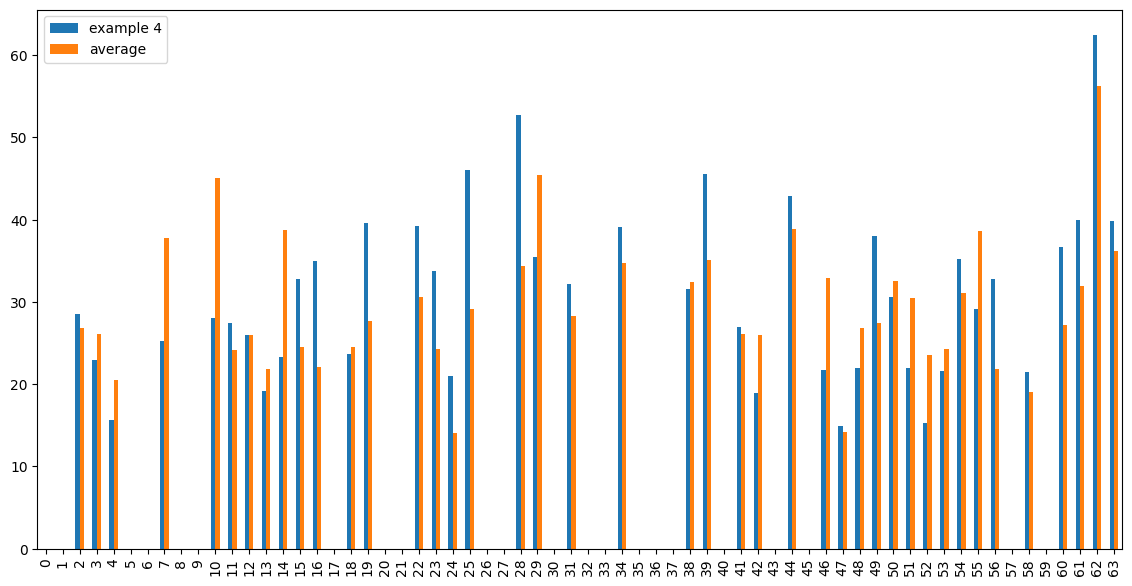

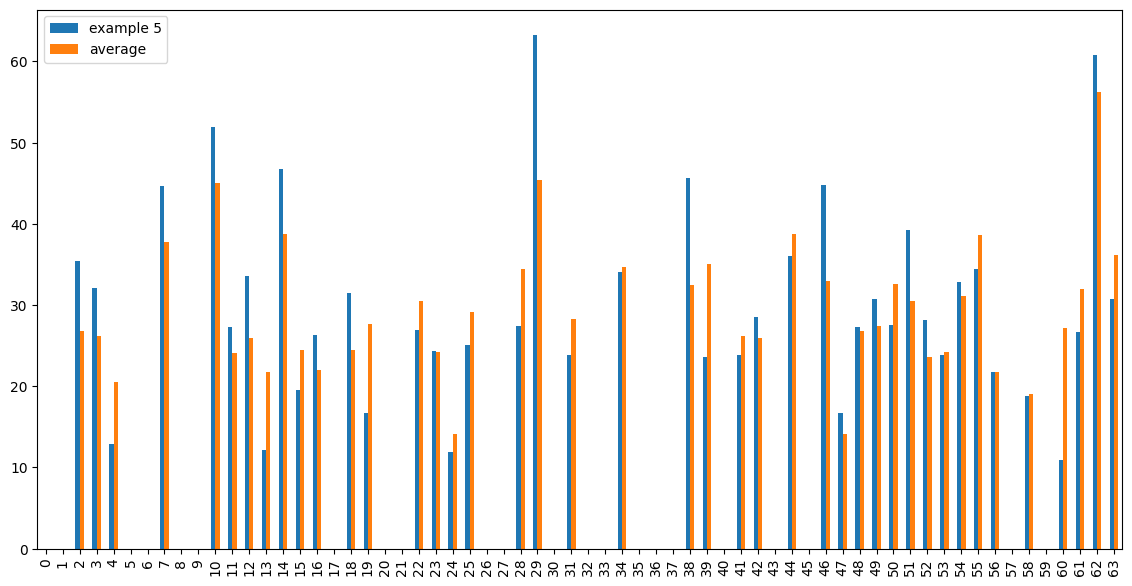

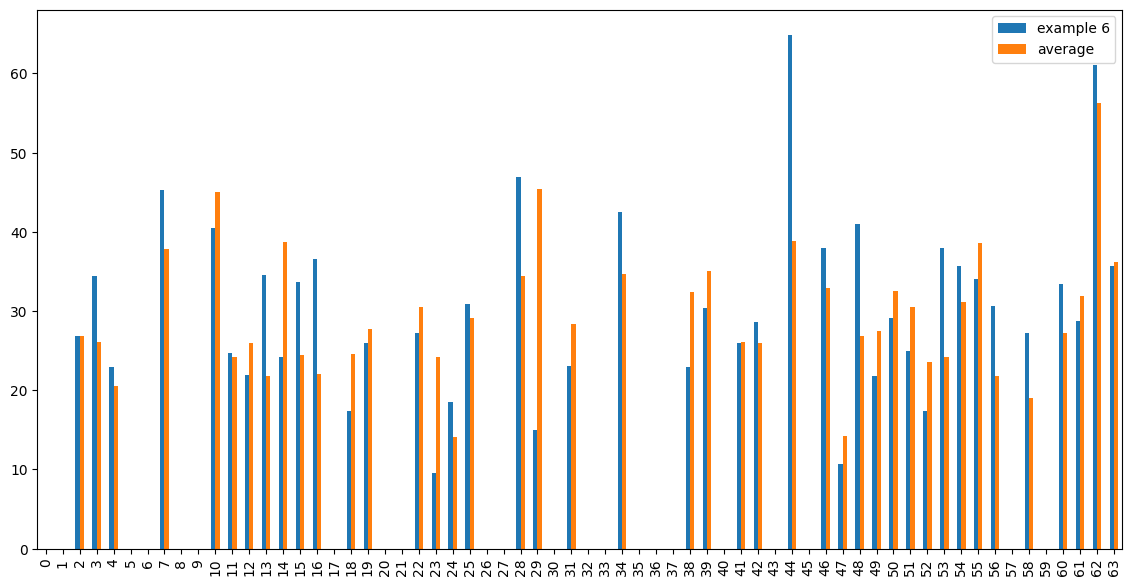

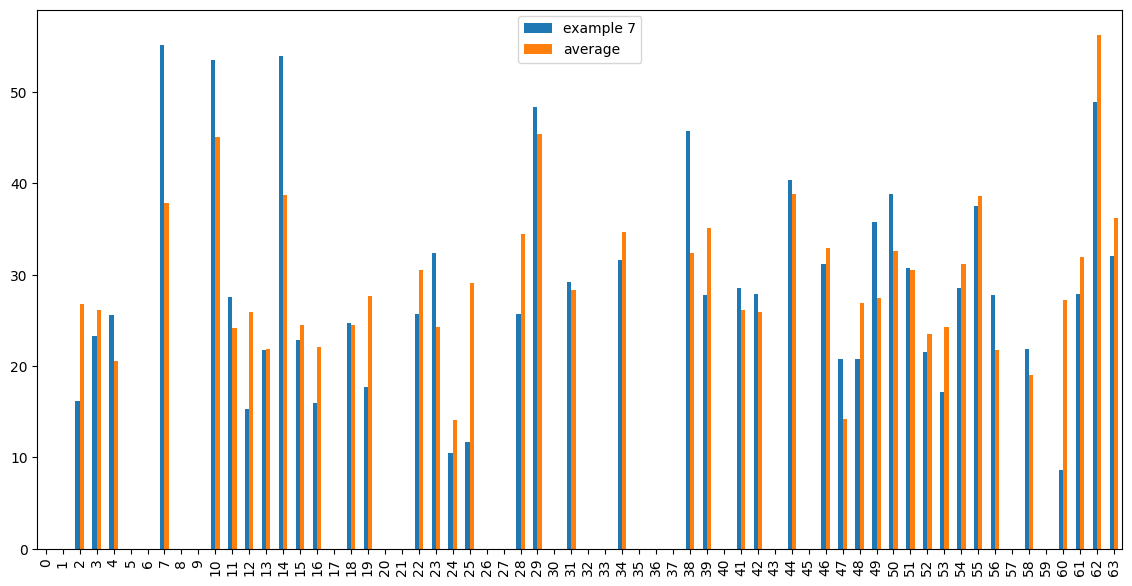

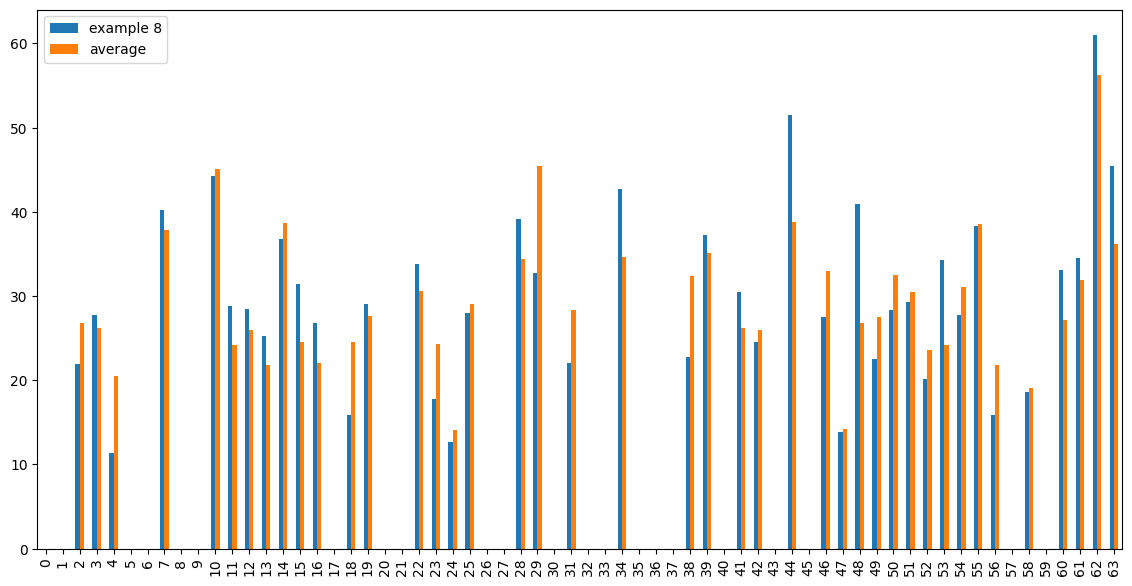

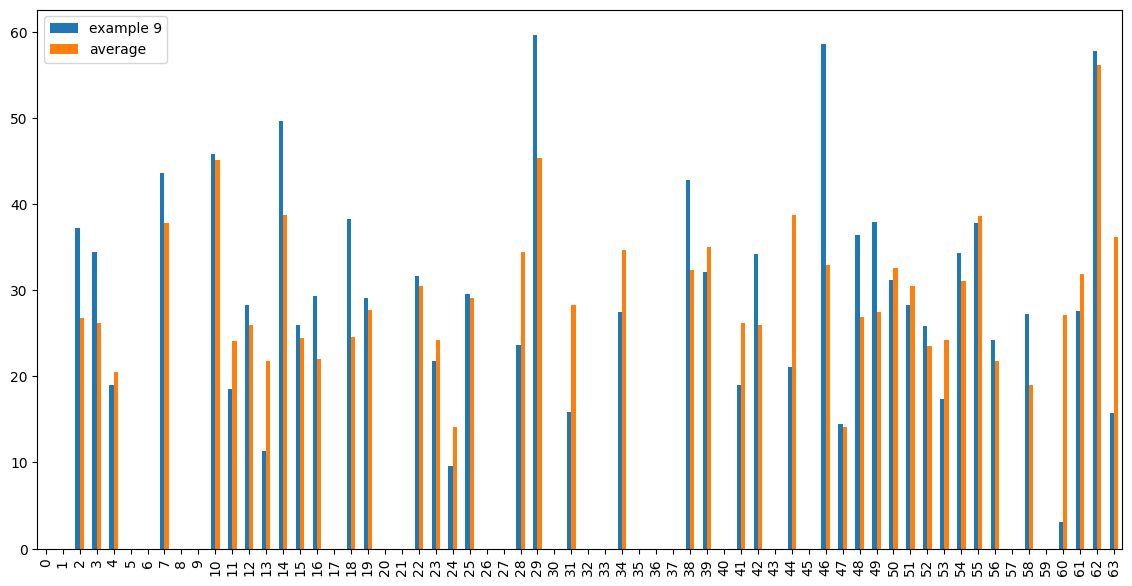

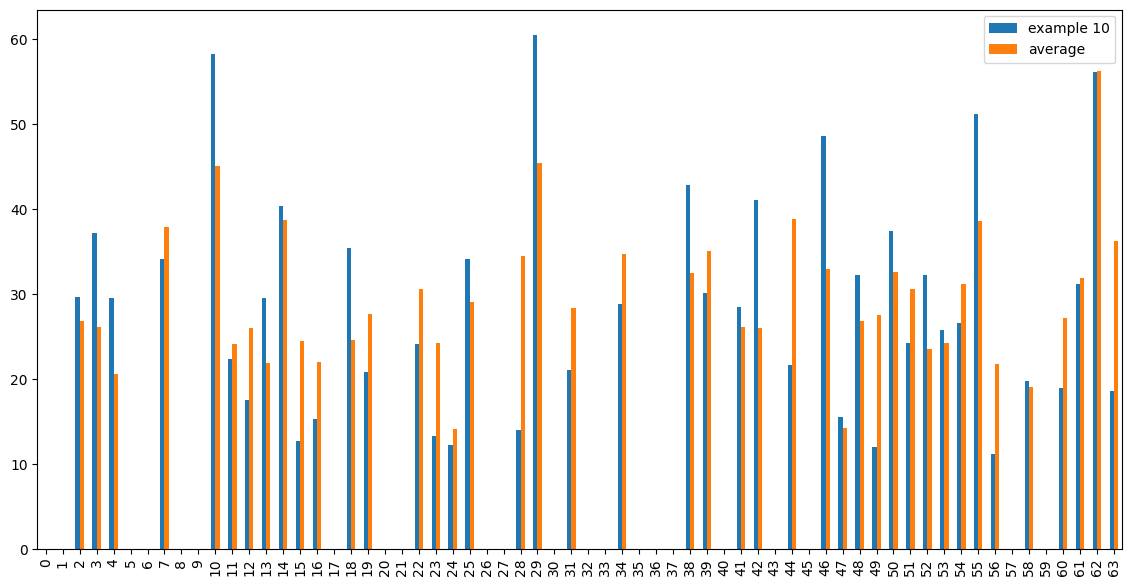

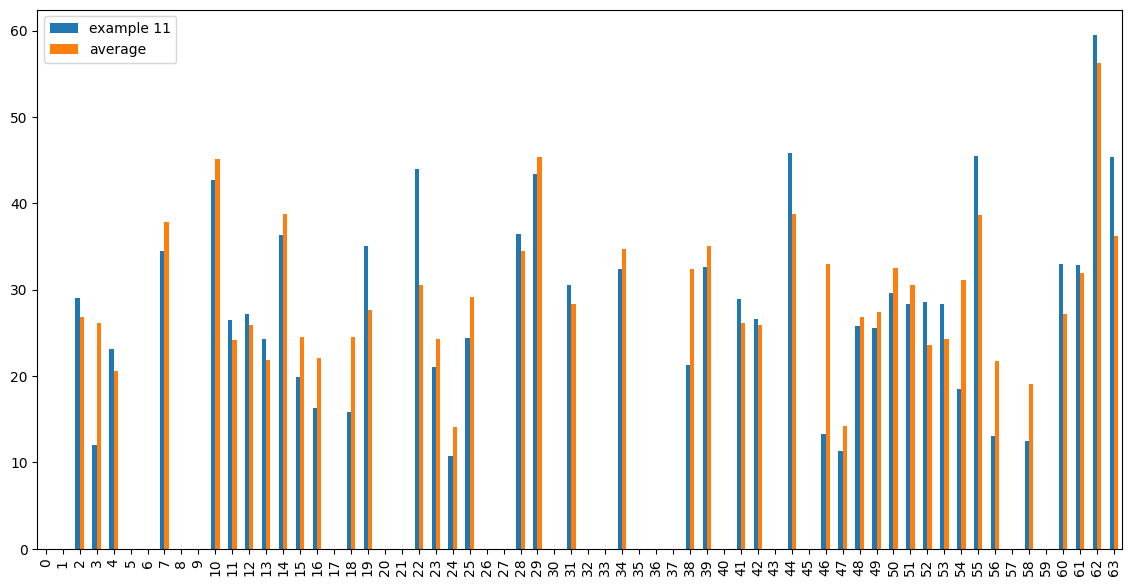

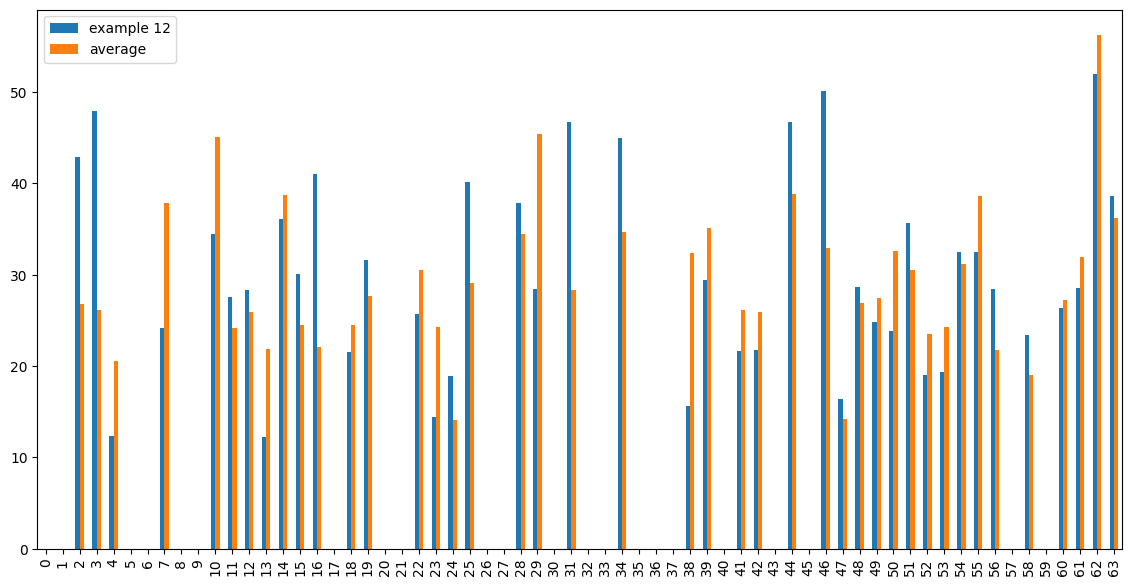

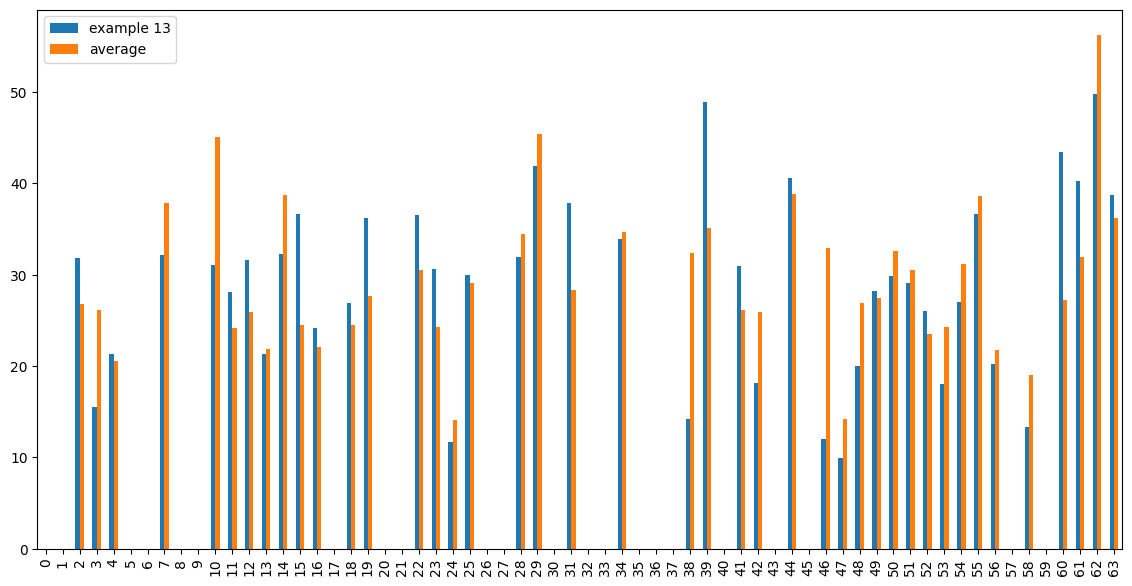

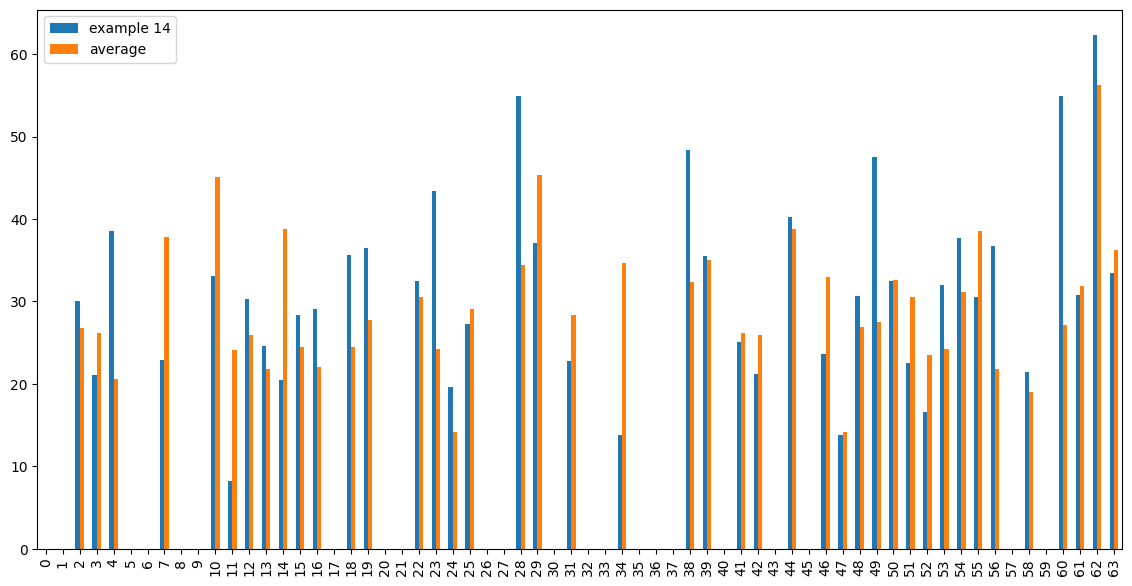

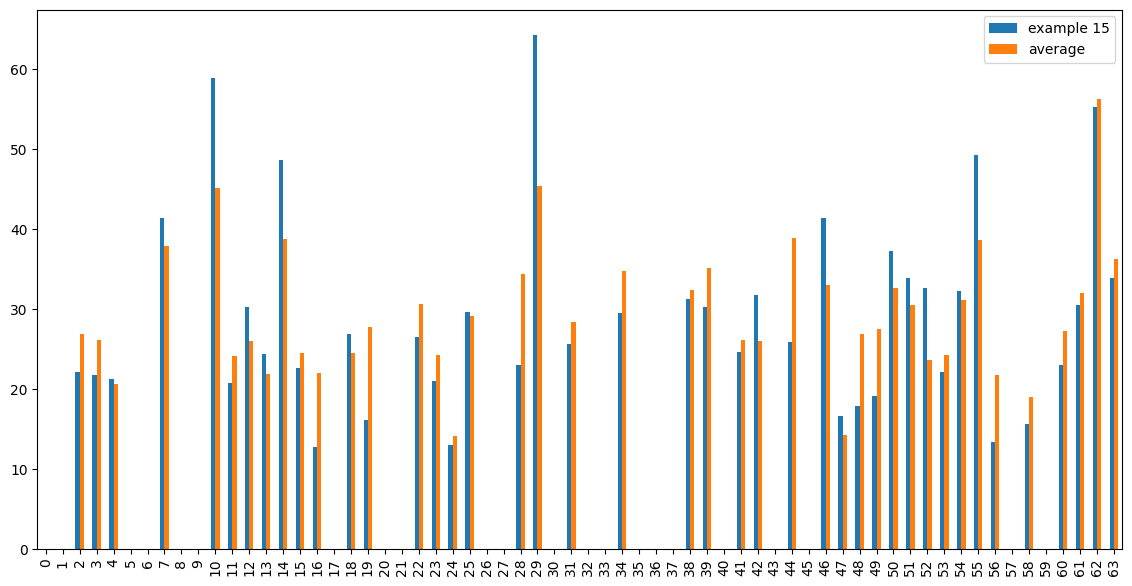

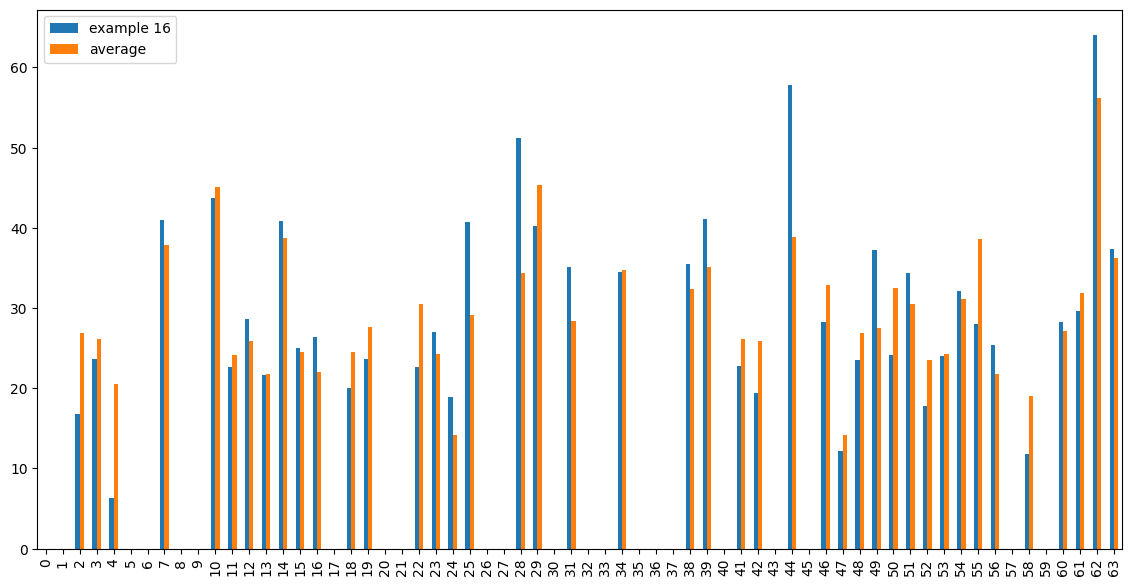

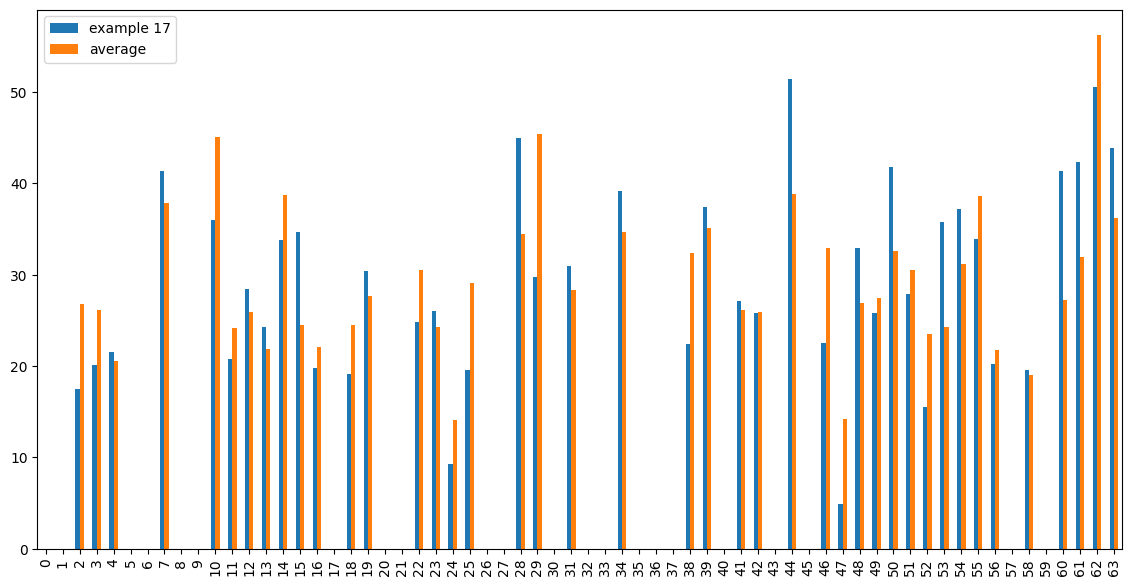

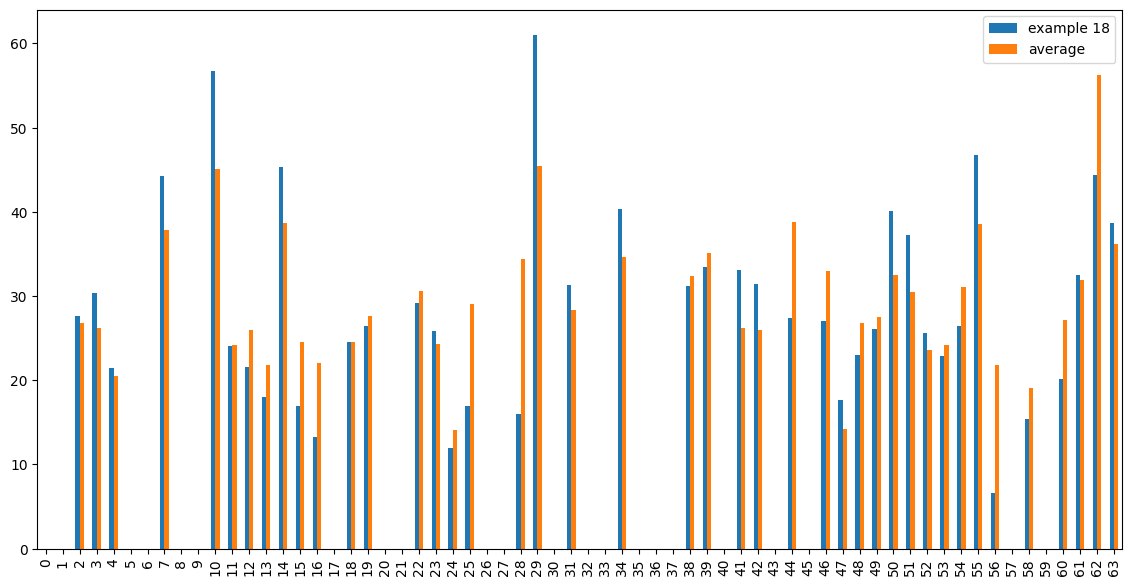

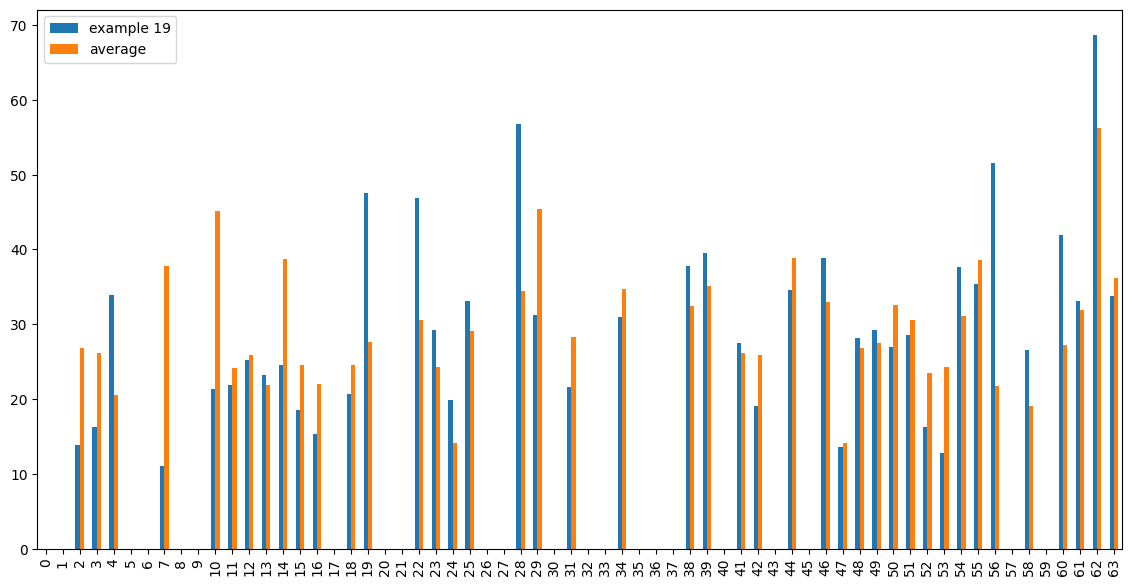

In [184]:
for label in range(20): 
    fig = plt.figure(figsize=(14, 7))

    ax = fig.add_subplot()
    df.plot(y = [f"example {label}", "average"], kind="bar", xticks=list(range(64)), ax=ax)

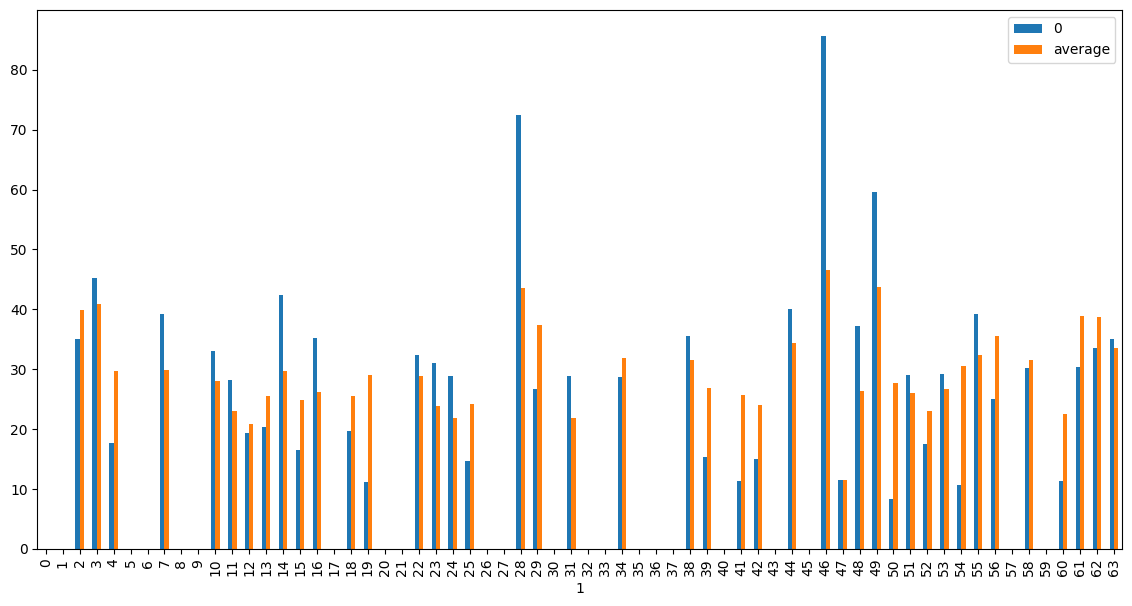

In [130]:
df = pd.DataFrame(flattened)

df["average"] = avg

fig = plt.figure(figsize=(14, 7))

for index in range(1): 
    
    ax = fig.add_subplot()
    df.plot(x=1, y = [index, "average"], kind="bar", xticks=list(range(64)), ax=ax)
    # tidy = df.melt(id_vars=index).rename(columns=str.title)
    # sns.barplot(data=df, x=df.index, y=index, ax=ax, hue="average").set(title=f"Label: {int(label)}", xticklabels=[])

In [122]:
avg

tensor([[0.0000e+00],
        [0.0000e+00],
        [3.9912e-41],
        [4.0963e-41],
        [2.9678e-41],
        [0.0000e+00],
        [0.0000e+00],
        [2.9842e-41],
        [0.0000e+00],
        [0.0000e+00],
        [2.7990e-41],
        [2.2998e-41],
        [2.0806e-41],
        [2.5554e-41],
        [2.9674e-41],
        [2.4881e-41],
        [2.6173e-41],
        [0.0000e+00],
        [2.5473e-41],
        [2.9069e-41],
        [0.0000e+00],
        [0.0000e+00],
        [2.8856e-41],
        [2.3882e-41],
        [2.1862e-41],
        [2.4184e-41],
        [0.0000e+00],
        [0.0000e+00],
        [4.3543e-41],
        [3.7398e-41],
        [0.0000e+00],
        [2.1790e-41],
        [0.0000e+00],
        [0.0000e+00],
        [3.1964e-41],
        [0.0000e+00],
        [0.0000e+00],
        [0.0000e+00],
        [3.1528e-41],
        [2.6888e-41],
        [0.0000e+00],
        [2.5740e-41],
        [2.4011e-41],
        [0.0000e+00],
        [3.4409e-41],
        [0

In [ ]:
width = 28





recon = []
amount = 10

for num in range(10):
        for imgs, labels in data_loader:
            if len(recon) >= 10:
                continue
            for img, label in zip(imgs, labels):
                if len(recon) >= 10:
                    continue
                if label != num:
                    continue

                img_rec = model(img).to(DEVICE).detach()
                # img_rec = img_rec.reshape(28, 28)
                recon.append(img_rec)
        recons.append(recon)
        recon = []

img = torch.zeros((amount * width, amount * width))

for i, recs in enumerate(recons):
    for j, recon in enumerate(recs):
        img[
            (amount - 1 - i) * width : (amount - 1 - i + 1) * width,
            j * width : (j + 1) * width,
        ] = recon
plt.title("Inference of autoencoder", fontsize=FONTSIZE_INFERENCE)
plt.xticks([])
plt.yticks([])
plt.imshow(img)
# dir_path = os.path.dirname(os.path.realpath(__file__))
# file_name = (
#     f"{os.path.basename(os.path.dirname(os.path.realpath(__file__)))}_inference.png"
# )
# plt.savefig(os.path.join(dir_path, file_name))
plt.show()
